In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

Cargar los datos

In [8]:
df = pd.read_csv('train.csv')

Explorar los datos

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


Vemos que hay 1 variable que es de tipo objeto (es cualitativa) y decidimos eliminarla. Veamos cual es:

In [10]:
df.dtypes

Id                      int64
Product_Info_1          int64
Product_Info_2         object
Product_Info_3          int64
Product_Info_4        float64
                       ...   
Medical_Keyword_45      int64
Medical_Keyword_46      int64
Medical_Keyword_47      int64
Medical_Keyword_48      int64
Response                int64
Length: 128, dtype: object

Vemos que la variable es la de Product_Info_2 y la eliminamos

In [11]:
df = df.drop(columns=["Product_Info_2"])

In [12]:
df.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [13]:
df.head()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,8
1,5,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,4
2,6,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,8
3,7,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,8
4,8,1,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,8


También podemos ver que se puede eliminar el ID

In [14]:
df = df.drop(columns=["Id"])

In [15]:
df.head()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,...,0,0,0,0,0,0,0,0,0,8
1,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,...,0,0,0,0,0,0,0,0,0,4
2,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,...,0,0,0,0,0,0,0,0,0,8
3,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,...,0,0,0,0,0,0,0,0,0,8
4,1,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,...,0,0,0,0,0,0,0,0,0,8


Graficando response

In [16]:
df["Response"].value_counts().sort_index()

1     6207
2     6552
3     1013
4     1428
5     5432
6    11233
7     8027
8    19489
Name: Response, dtype: int64

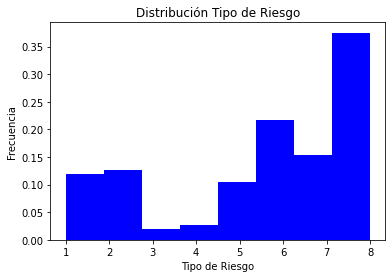

In [17]:
plt.hist(df["Response"],density=True,bins=8, color='blue')
plt.title("Distribución Tipo de Riesgo")
plt.xlabel("Tipo de Riesgo")
plt.ylabel("Frecuencia")
plt.show()

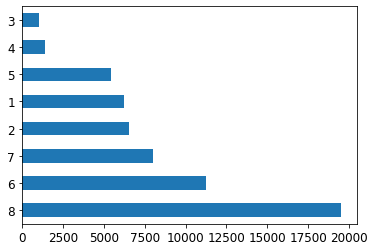

In [18]:
ax = df["Response"].value_counts().plot(kind="barh", rot=0, fontsize = "12")

Valores nulos

In [19]:
df.isnull().values.any()

True

Si hay nans, en total 393,103

In [20]:
df.isnull().sum().sum()

393103

Eliminando/reemplazando nans

In [21]:
df.fillna(method="bfill", inplace=True)

In [22]:
df.fillna(method="ffill", inplace=True)

In [23]:
df.isnull().sum().sum()

0

Duplicados

In [24]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
59376    False
59377    False
59378    False
59379    False
59380    False
Length: 59381, dtype: bool

In [25]:
sum(df.duplicated())

0

No hay duplicados y no los tenemos que eliminar

Separamos datos en X y Y 

In [27]:
X = df.iloc[:, df.columns != 'Response']
y = df.Response

Hay muchas variables regresora entonces aplicamos PCA a x y queremos mantener un 95% de la variabiliad de la información (alfa = 95%) 

In [28]:
pca = PCA(n_components = 0.95)

In [29]:
X_PCA = pca.fit_transform(X)

In [30]:
scaler = preprocessing.StandardScaler().fit(X_PCA)
X_scaled = scaler.transform(X_PCA)

Modelo solo con regularizacion

In [31]:
model = LogisticRegression(penalty = "l2")

Fit como el predict con cv

In [32]:
CV = cross_val_predict(model, X_scaled, y, cv=10)

In [33]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y, CV)
print(accuracy)


0.3282026237348647


In [34]:
f1 = metrics.f1_score(y, CV, average = 'weighted')
print(f1)

0.1621995925946184


In [35]:
recall_s = metrics.recall_score(y, CV, average = 'weighted')
print(recall_s)

0.3282026237348647


In [36]:
precision = metrics.precision_score(y, CV, average = 'weighted')
print(precision)

0.10771696222644916


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
confusion_matrix = metrics.confusion_matrix(y, CV)

In [38]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 2,3,4,5,6,7,8])

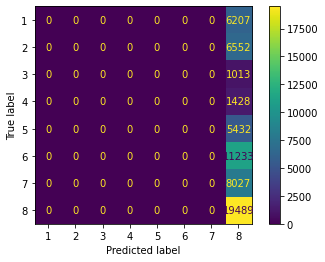

In [39]:
cm_display.plot()
plt.show()

Modelo con balanced

In [40]:
model = LogisticRegression(penalty = "l2", class_weight = "balanced")

In [41]:
CV = cross_val_predict(model, X_scaled, y, cv=10)

In [42]:
accuracy = metrics.accuracy_score(y, CV)
print(accuracy)

0.13467270675805393


In [43]:
f1 = metrics.f1_score(y, CV, average = 'weighted')
print(f1)

0.13486313084989882


In [44]:
recall_s = metrics.recall_score(y, CV, average = 'weighted')
print(recall_s)

0.13467270675805393


In [45]:
precision = metrics.precision_score(y, CV, average = 'weighted')
print(precision)

0.20082047974356945


In [46]:
confusion_matrix = metrics.confusion_matrix(y, CV)

In [47]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 2,3,4,5,6,7,8])

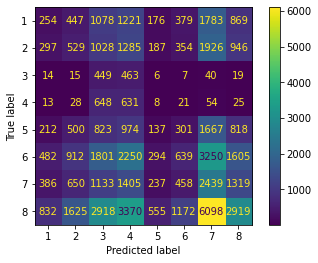

In [48]:
cm_display.plot()
plt.show()

Modelo con C pequeño

In [49]:
model = LogisticRegression(penalty = "l2", C = 0.1)

In [50]:
CV = cross_val_predict(model, X_scaled, y, cv=10)

In [51]:
accuracy = metrics.accuracy_score(y, CV)
print(accuracy)

0.3282026237348647


In [52]:
f1 = metrics.f1_score(y, CV, average = 'weighted')
print(f1)

0.1621995925946184


In [53]:
recall_s = metrics.recall_score(y, CV, average = 'weighted')
print(recall_s)

0.3282026237348647


In [54]:
precision = metrics.precision_score(y, CV, average = 'weighted')
print(precision)

0.10771696222644916


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
confusion_matrix = metrics.confusion_matrix(y, CV)

In [56]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 2,3,4,5,6,7,8])

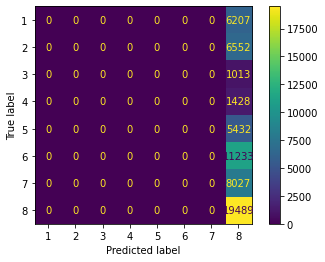

In [57]:
cm_display.plot()
plt.show()

Modelo con C mayor a 1

In [58]:
model = LogisticRegression(penalty = "l2", C = 2)

In [59]:
CV = cross_val_predict(model, X_scaled, y, cv=10)

In [60]:
accuracy = metrics.accuracy_score(y, CV)
print(accuracy)

0.3282026237348647


In [61]:
f1 = metrics.f1_score(y, CV, average = 'weighted')
print(f1)

0.1621995925946184


In [62]:
recall_s = metrics.recall_score(y, CV, average = 'weighted')
print(recall_s)

0.3282026237348647


In [63]:
precision = metrics.precision_score(y, CV, average = 'weighted')
print(precision)

0.10771696222644916


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
confusion_matrix = metrics.confusion_matrix(y, CV)

In [65]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 2,3,4,5,6,7,8])

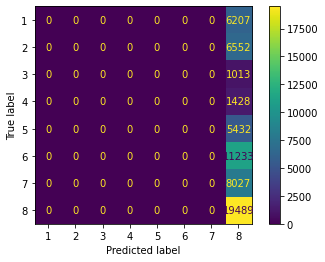

In [66]:
cm_display.plot()
plt.show()

Modelo con C pequeño y Balanced

In [67]:
model = LogisticRegression(penalty = "l2", class_weight = "balanced", C = 0.1)

In [68]:
CV = cross_val_predict(model, X_scaled, y, cv=10)

In [69]:
accuracy = metrics.accuracy_score(y, CV)
print(accuracy)

0.13460534514406966


In [70]:
f1 = metrics.f1_score(y, CV, average = 'weighted')
print(f1)

0.13472508407657063


In [71]:
recall_s = metrics.recall_score(y, CV, average = 'weighted')
print(recall_s)

0.13460534514406966


In [72]:
precision = metrics.precision_score(y, CV, average = 'weighted')
print(precision)

0.20077494732140996


In [73]:
confusion_matrix = metrics.confusion_matrix(y, CV)

In [74]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 2,3,4,5,6,7,8])

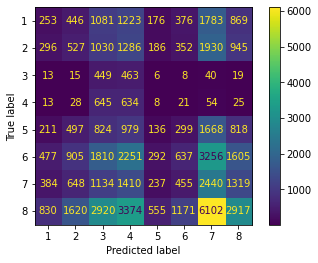

In [75]:
cm_display.plot()
plt.show()

Modelo con C grande y balanced

In [76]:
model = LogisticRegression(penalty = "l2", class_weight = "balanced", C = 2)

In [77]:
CV = cross_val_predict(model, X_scaled, y, cv=10)

In [78]:
accuracy = metrics.accuracy_score(y, CV)
print(accuracy)

0.13468954716155


In [79]:
f1 = metrics.f1_score(y, CV, average = 'weighted')
print(f1)

0.13488777871712504


In [80]:
recall_s = metrics.recall_score(y, CV, average = 'weighted')
print(recall_s)

0.13468954716155


In [81]:
precision = metrics.precision_score(y, CV, average = 'weighted')
print(precision)

0.20085621099427406


In [82]:
confusion_matrix = metrics.confusion_matrix(y, CV)

In [83]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 2,3,4,5,6,7,8])

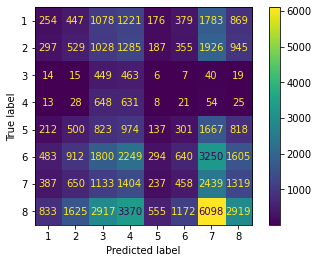

In [84]:
cm_display.plot()
plt.show()